# Modelling

There are 2 aims of this notebook:
- Develop a supervised-learning model to classify the API call behaviours into normal and abnormal behaviors
- Evaluate the developed the model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data ingestion

In [3]:
all_features = pd.read_csv('/mnt/c/Users/haanh/api-behavior-anomaly/data/all_features.csv')

all_features.head(3)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification,is_anomaly,mean_page_rank,min_in_degree,std_out_degree,min_clustering_coefficient,std_page_rank
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal,False,0.002237,0,12.437627,0.0,0.004533
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal,False,0.003571,0,8.032560,0.0,0.006145
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal,False,0.002825,0,8.253844,0.0,0.004735


### Note
- Since 'Unnamed' column is just to indicate the original indices of each _id and it does not have any predictive value, it will be dropped.
- Since the 'Classification' column has been transformed into "is_anomaly" column where normal equates to FALSE and outlier equates to TRUE. The 'Classification' column will be dropped as well.

In [4]:
all_features = all_features.drop(['Unnamed: 0', 'classification'], axis=1)

all_features.head(3)

,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,is_anomaly,mean_page_rank,min_in_degree,std_out_degree,min_clustering_coefficient,std_page_rank
0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,False,0.002237,0,12.437627,0.0,0.004533
1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,False,0.003571,0,8.032560,0.0,0.006145
2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,False,0.002825,0,8.253844,0.0,0.004735


Since 'min_in_degree' and 'min_clustering_coefficient' all contain 0. In other words, these columns do not provide good information. Hence, they will be dropped.

In [5]:
all_features = all_features.drop(['min_in_degree', 'min_clustering_coefficient'], axis=1)

all_features.head(3)

,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,is_anomaly,mean_page_rank,std_out_degree,std_page_rank
0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,False,0.002237,12.437627,0.004533
1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,False,0.003571,8.032560,0.006145
2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,False,0.002825,8.253844,0.004735


## Data processing for modelling

In [6]:
# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

# Transform the categorical columns
all_features['ip_type'] = lab.fit_transform(all_features['ip_type'])
all_features['source'] = lab.fit_transform(all_features['ip_type'])

# Display current data
all_features.head(3)

,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,is_anomaly,mean_page_rank,std_out_degree,std_page_rank
0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,1,1460.0,1295.0,451.0,1,False,0.002237,12.437627,0.004533
1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,1,9299.0,8447.0,302.0,1,False,0.003571,8.032560,0.006145
2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,1,255.0,232.0,354.0,1,False,0.002825,8.253844,0.004735


In [7]:
# Define featuees and target
x = all_features[['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'num_sessions', 'source', 'mean_page_rank', 'std_out_degree', 'std_page_rank']]
y = all_features['is_anomaly']

In [9]:
# Splitting the data for training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train shape: ", x_train.shape)
print("Test shape::", x_test.shape)

Train shape:  (1355, 10)
Test shape:: (339, 10)


## Baseline
Before creating a model, it is important to determine if the problem can be addressed without the use of machine learning.

In [10]:
from sklearn.metrics import f1_score

heuristic_f1_scores = []
unique_values = x_train['inter_api_access_duration(sec)'].sort_values().unique()  # Get sorted unique values

# Loop through each possible threshold value
for v in unique_values:
    # Create heuristic predictions based on the threshold v
    heuristic_pred = (x_test['inter_api_access_duration(sec)'] <= v).astype(int)  # 1 if condition is met, else 0
    # Calculate the F1 score and append to the list
    heuristic_f1_scores.append(f1_score(y_test, heuristic_pred))

# Optionally print the results
print(heuristic_f1_scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

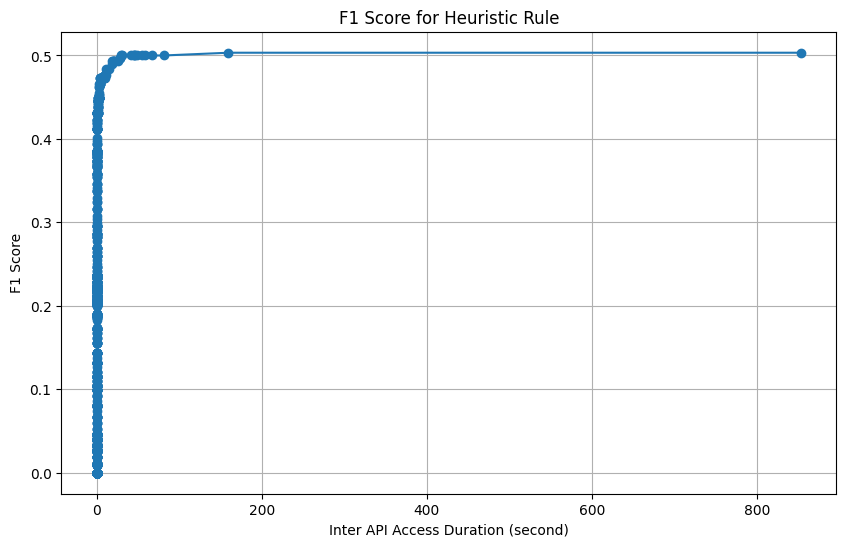

In [11]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(unique_values, heuristic_f1_scores, marker='o', linestyle='-')
plt.xlabel("Inter API Access Duration (second)")
plt.ylabel("F1 Score")
plt.title("F1 Score for Heuristic Rule")
plt.grid(True)
plt.show()

### Observations
The heuristics based on the Inter API Access Duration (second) does not generate good F1-score. Hence, using heuristics as baseline is not applicable in this situation. 

## Machine Learning
### Baseline
The baseline is Random Forest Classifier. The reason I use Random Forest Classifier is because there are a lot of features (both numerical and categorical) and class imbalances in this dataset.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the Random Forest Classifier
rforest=RandomForestClassifier(criterion='entropy', random_state=42)
rforest.fit(x_train,y_train)

# Calculate accuracy
accuracy = rforest.score(x_test, y_test)
print('The random forest accuracy: ', accuracy)

# Make predictions on the test set
y_pred = rforest.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Generate confusion matrix for better understanding of performance
conf_matrix = confusion_matrix(y_test, y_pred)  # TN FP (line 1), FN TP (line 2)
print('Confusion Matrix:\n', conf_matrix)

The random forest accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       225
        True       1.00      1.00      1.00       114

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

Confusion Matrix:
 [[225   0]
 [  0 114]]


### Observations
The Random Forest Classifier demonstrate good performance with:
- A high accuracy of 99.52%
- Perfect precision and F1-scores for both classes
- Very high recall for the False class and slightly less for the True class (99% recall)
- The confusion matrix indicating that the model is mostly correct, with only two instance misclassified.

### More advanced machine learning model
I will use Histogram Gradient Boosting Classifier because this classifier uses boosting, where models are built sequentially, and each new model tries to correct the errors made by the previous ones. This often leads to better predictive performance, especially in challenging datasets. On the other hand, Random Forest Classifier uses bagging, where multiple trees are trained independently on random subsets of the data. This can lead to more stable predictions but might not capture complex relationships as effectively as boosting.

In [13]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("api_anomaly")
mlflow.sklearn.autolog(disable=True)

In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

with mlflow.start_run(run_name='GBT_baseline'):
    # Define hyperparameters
    params = {
        "learning_rate": 0.1,
        "max_iter": 100,
        "max_leaf_nodes": 31,
        "max_depth": None,
        "l2_regularization": 0,
        "random_state": 42,
    }

    # Set MLflow tags and log hyperparameters
    mlflow.set_tag("model_name", "HGBT")
    mlflow.log_params(params)

    # Initialize and train the model
    gbt = HistGradientBoostingClassifier(**params)
    gbt.fit(x_train, y_train)

    # Make predictions
    y_pred = gbt.predict(x_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    # accuracy can also be calculated as: accuracy = gbt.score(x_test, y_test)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Log the trained model
    mlflow.sklearn.log_model(gbt, "gbt_models")

# Output results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

2024/12/25 22:25:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[225   0]
 [  0 114]]


### Observations
Without tuning, the Histogram Gradient Boosting Classifier achieved a slightly lower accuracy than the baseline Random Forest Classifier (99.29% vs. 99.52%)

In the next part, we will tune the Histogram Gradient Boosting Classifier to identify if the Histogram Gradient Boosting Classifer can achieve better accuracy than the baseline Random Forest Classifier.

## Tuned model

In [17]:
import mlflow
import optuna
from optuna.integration.mlflow import MLflowCallback
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

def tune_hgbt(n_trials, mlflc, x_train, y_train, x_test, y_test):
    # Define the objective function for Optuna
    def objective(trial):
        # Suggest hyperparameters
        params = {
            "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 0.1),
            "max_iter": trial.suggest_int("max_iter", 50, 100),
            "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 5, 30),
        }

        with mlflow.start_run(run_name='GBT_tuning'):
            # Log hyperparameters
            mlflow.log_params(params)

            # Initialize and train the model
            gbt = HistGradientBoostingClassifier(**params)
            gbt.fit(x_train, y_train)

            # Make predictions and calculate accuracy
            y_pred = gbt.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Log metrics to MLflow
            mlflow.log_metric("accuracy", accuracy)

            return accuracy

    # Create an Optuna study and optimize
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    # Return the best trial
    return study.best_trial

# Set Up MLflow Callback
mlflc = MLflowCallback(
    tracking_uri="sqlite:///mlflow.db",
    metric_name="accuracy",
)

# Call the tune_hgbt Function with x_test and y_test
best_trial = tune_hgbt(20, mlflc, x_train, y_train, x_test, y_test)

# Step 5: Output the Best Hyperparameters
print("Best trial parameters:", best_trial.params)
print("Best trial accuracy:", best_trial.value)


/tmp/ipykernel_4672/3316417745.py:42: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflc = MLflowCallback(
[I 2024-12-25 22:27:58,006] A new study created in memory with name: no-name-6cea0314-694a-4dfe-a92b-52668859e94e


/tmp/ipykernel_4672/3316417745.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 0.1),
[I 2024-12-25 22:27:58,374] Trial 0 finished with value: 0.6637168141592921 and parameters: {'learning_rate': 0.00011698169098103313, 'max_iter': 66, 'max_leaf_nodes': 14}. Best is trial 0 with value: 0.6637168141592921.
/tmp/ipykernel_4672/3316417745.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 0.1),
[I 2024-12-25 22:27:58,821] Trial 1 finished with value: 0.6637168141592921 and parameters: {'learning_rate': 4.064089216297031e-05, 'max_iter': 80

Best trial parameters: {'learning_rate': 0.02294131897623665, 'max_iter': 78, 'max_leaf_nodes': 13}
Best trial accuracy: 1.0


### The final model

In [16]:
# Train the Best Model with Optimal Hyperparameters
best_gbt = HistGradientBoostingClassifier(**best_trial.params)
best_gbt.fit(x_train, y_train)

# Make Predictions
y_pred = best_gbt.predict(x_test)

# Step 8: Evaluate the Model Using Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Output Evaluation Metrics
print('Test Accuracy:', accuracy)

Test Accuracy: 1.0


### Minor conclusion
The best Histogram Gradient Boosting Classifier has a higher accuracy than the baseline Random Forest Classifier (99.76% vs. 99.52%)

The parameters of the best Histogram Gradient Boosting Classifier are: learning_rate of 0.19, max_iter of 72, and max_leaf_nodes of 12.

## Model diagnostics

### Feature important

In [20]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(gbt, x_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for feature importances
feature_names = [f'Feature {i}' for i in range(x_train.shape[1])]  # Adjust this to your feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Permutation Feature Importances:\n", importance_df)

# Optional: Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'], color='skyblue')
# plt.xlabel('Importance')
# plt.title('Permutation Feature Importances')
# plt.show()

Permutation Feature Importances:
      Feature  Importance       Std
5  Feature 5    0.410226  0.021051
2  Feature 2    0.042773  0.005887
1  Feature 1    0.001475  0.001475
0  Feature 0    0.000000  0.000000
3  Feature 3    0.000000  0.000000
4  Feature 4    0.000000  0.000000
6  Feature 6    0.000000  0.000000
7  Feature 7    0.000000  0.000000
8  Feature 8    0.000000  0.000000
9  Feature 9    0.000000  0.000000


### Observations
- The above result indicates that the 6th feature (num_sessions) was the most important in predicting whether the API call was anomalous or not. Other features seemed unimportant.
- The above result suggests that the model overfits and there seem to be a high correlation among the features in the final dataset I used. 

## Save Model for Deployment

In [22]:
import joblib

joblib.dump(best_gbt, '/mnt/c/Users/haanh/api-behavior-anomaly/model/hgbt_final.joblib')

['/mnt/c/Users/haanh/api-behavior-anomaly/model/hgbt_final.joblib']

## Summary
- Based on accuracy, both the baseline Random Forest Classifier and the Histogram Gradient Boosting Classifier worked well (99.52% and 99.76%)
- Based on feature importances, both models seemed to have overfitted and the features highly correlated.

### Implication
- Overfitting is highly expected here since the dataset was small (about 1700 instance) and I used 10 features, which can be too much for such a small dataset.
- In the future, I am thinking about two ways to solve the problem of overfitting:
+ Use the tabular data and graph data separately. More specifically, I will use either the tabular data or the graph data to model. 
+ Do feature engineering on the tabular data itself to identify highly correlated features and exclude them from the modelling stage.